In [3]:
%matplotlib widget
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering

RuntimeError: 'widget is not a recognised GUI loop or backend name

##########################################################################################################
########################################  Завантаження EXCEL файлу ############################################
##########################################################################################################

Data was imported


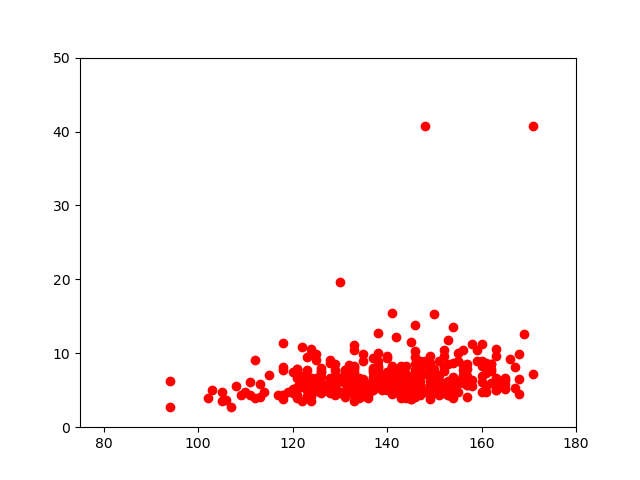

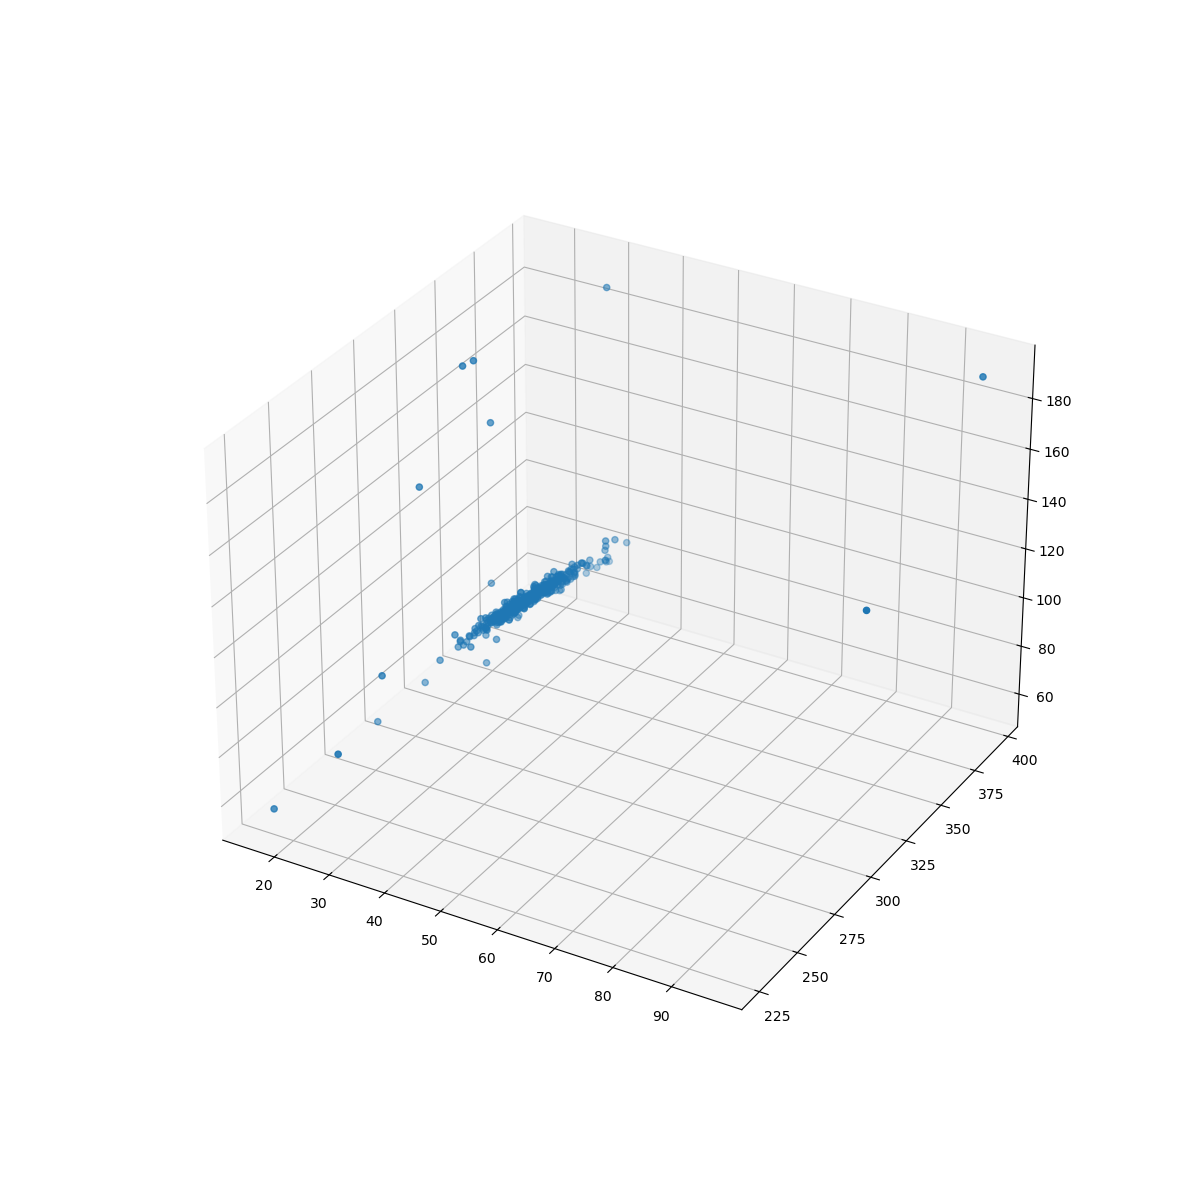

In [2]:
df_male = pd.read_excel('datasets/gemogramma.xlsx',
                          sheet_name='male',
                          names=['Age',
                                 'MCH',
                                 'MCHC',
                                 'MCV',
                                 'MPV',
                                 'PDW',
                                 'RDW',
                                 'Hematocrit',
                                 'Hemoglobin',
                                 'Granulocytes',
                                 'Red blood cells',
                                 'Leukocytes',
                                 'Lymphocytes',
                                 'Monocyte',
                                 'Thrombocrit',
                                 'Thrombocytes',
                                 'ESR'])

print('Data was imported')

# Scatterplot of two parameters
plt.scatter(df_male['Hemoglobin'], df_male['Leukocytes'], color=(1,0,0))
plt.xlim(75, 180)
plt.ylim(0, 50)
plt.show()





fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

sequence_containing_x_vals = list(range(220, 400))
sequence_containing_y_vals = list(range(0, 180))
sequence_containing_z_vals = list(range(0, 1000))



ax.scatter(df_male['MCH'],df_male['MCHC'],df_male['MCV'])
plt.show()



##############################################################################################################
################################## FILL EMPTY CORNERS WITH POLYNOMIAL INTERPOLATION ###############################
##############################################################################################################

In [3]:
print('------------INFO DATAFRAME MALE------------')
print('SIZE: ', df_male.size)
print('ROWS: ', df_male.shape[0])
print('ISNULL: ', df_male.isnull().sum().sum())

df_male = df_male.dropna(subset=['Age'])

df_male = df_male.drop(df_male[df_male['Age'] < 23].index)
df_male = df_male.drop(df_male[df_male['Age'] > 90].index)

df_male = df_male.dropna(thresh=8)

df_male = df_male.sort_values(by='Age')
df_male.interpolate(method='polynomial', order=2)       # !!!!!!!!!!!!!!
df_male = df_male.ffill()
df_male = df_male.bfill()
df_male = df_male.sort_index()
df_male = df_male.sample(frac=1).reset_index(drop=True)
df_male = df_male.reset_index(drop=True)

print('------------INFO DATAFRAME FEMALE (after)------------')
print('SIZE: ', df_male.size)
print('ROWS: ', df_male.shape[0])
print('ISNULL: ', df_male.isnull().sum().sum())

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

------------INFO DATAFRAME MALE------------
SIZE:  6987
ROWS:  411
ISNULL:  28
------------INFO DATAFRAME FEMALE (after)------------
SIZE:  6936
ROWS:  408
ISNULL:  0


###################################################################################################################
################################################# NORMALIZATION ###################################################
###################################################################################################################

In [4]:
# Шаг 1: Создание объекта MinMaxScaler
scaler = MinMaxScaler()

# Шаг 2: Применение нормализации к данным
df_normalized = pd.DataFrame(scaler.fit_transform(df_male), columns=df_male.columns)

###################################################################################################################
############################################# DISTANCE MATRIX #####################################################
###################################################################################################################

In [5]:
distance_matrix_euclidean = pdist(df_normalized, metric='euclidean')
distance_matrix_manhetten = pdist(df_normalized, metric='cityblock')
distance_matrix_mahalonobis = pdist(df_normalized, metric='mahalanobis')

###################################################################################################################
############################################## CLASTERIZATION #####################################################
###################################################################################################################

In [6]:
# Шаг 4: Агломеративная кластеризация
Z = linkage(distance_matrix_euclidean, method='ward')
Z2 = linkage(distance_matrix_manhetten, method='ward')
Z3 = linkage(distance_matrix_mahalonobis, method='ward')


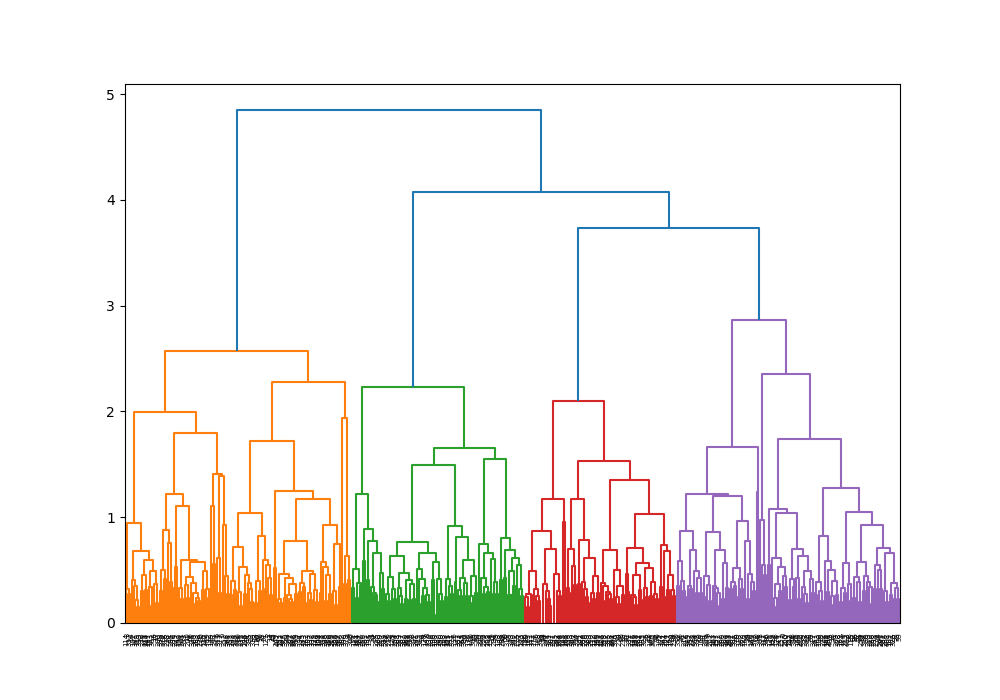

In [7]:
# Шаг 5: Построение дендрограммы
plt.figure(figsize=(10, 7))
dendrogram(Z)

plt.show()



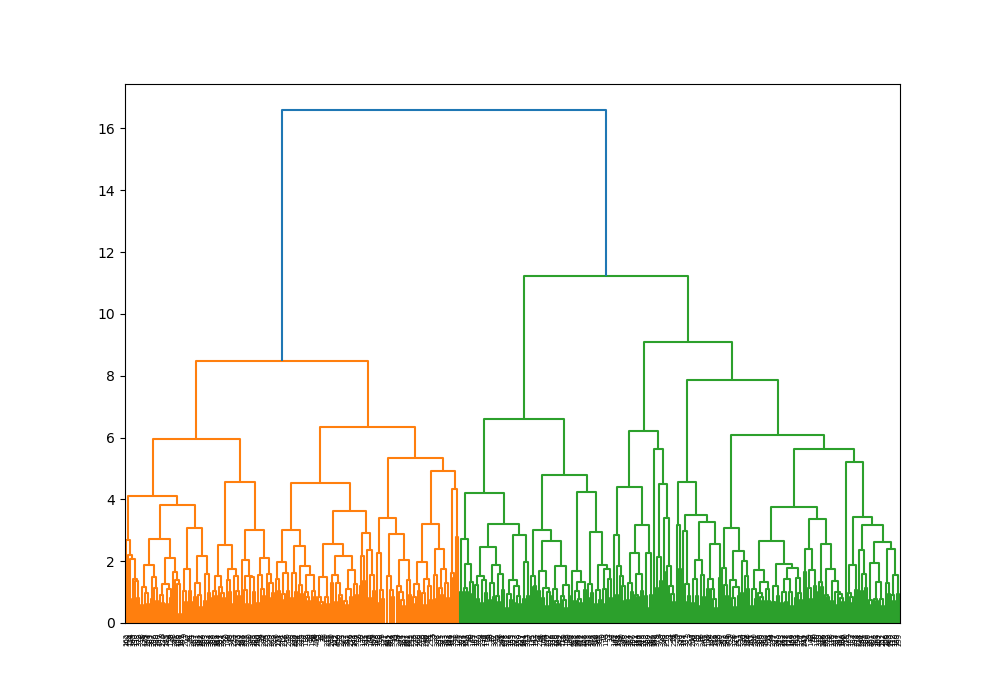

In [8]:
plt.figure(figsize=(10, 7))
dendrogram(Z2)
plt.show()


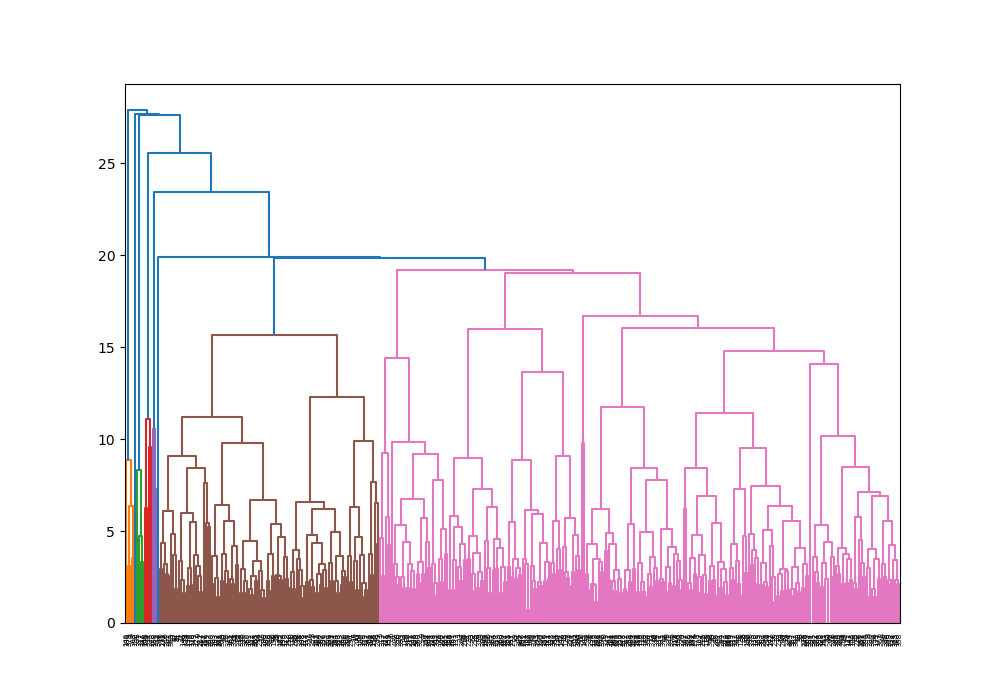

In [9]:
plt.figure(figsize=(10, 7))
dendrogram(Z3)
plt.show()



408
[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
408
DIVISION COEFFICIENT: {0} 0.999999999999997
Crisp_index: {0} 0.9999999999999967
[1 8 3 0 2 0 0 1 7 4 0 0 3 3 1 9 0 0 1 7 7 1 3 3 4 5 7 0 5 0 4 8 1 4 5 3 1
 1 1 1 8 4 5 3 3 7 5 5 7 7 7 3 8 7 9 1 4 3 7 1 4 0 1 0 0 1 0 3 1 4 3 1 5 7
 5 7 9 7 6 7 3 4 1 4 7 1 1 5 1 9 0 3 0 1 7 1 5 1 7 4 1 1 0 3 3 5 1 8 7 1 0
 9 5 3 0 1 3 6 4 0 5 3 1 5 1 1 5 5 7 7 4 7 8 5 7 0 5 3 7 1 7 5 5 7 1 9 3 7
 3 0 7 3 3 0 8 7 3 4 3 3 8 8 4 9 5 4 1 5 9 1 5 7 4 7 3 3 7 9 3 7 7 9 2 4 1
 5 9 7 9 5 0 7 0 7 3 8 4 5 0 5 0 0 4 4 5 0 8 9 7 1 1 1 4 3 0 1 4 8 5 3 4 7
 1 5 7 0 3 5 0 0 7 7 5 4 5 7 7 3 1 7 7 7 3 5 9 3 3 0 3 3 5 1 0 1 7 8 8 4 5
 1 1 1 3 1 9 5 1 4 7 1 5 4 1 1 1 7 5 7 5 7 8 5 4 0 7 0 1 3 3 7 4 9 9 7 5 1
 7 0 1 5 7 5 7 4 4 4 3 4 1 7 3 3 5 0 8 7 0 1 9 7 1 5 1 7 5 7 1 3 1 8 2 4 5
 4 0 3 0 0 3 0 5 0 1 7 4 9 6 0 0 4 3 1 4 0 5 7 5 7 7 0 0 8 0 4 0 4 3 3 2 3
 5 7 9 4 9 0 5 0 2 0 3 7 1 7 1 3 7 7 3 5 7

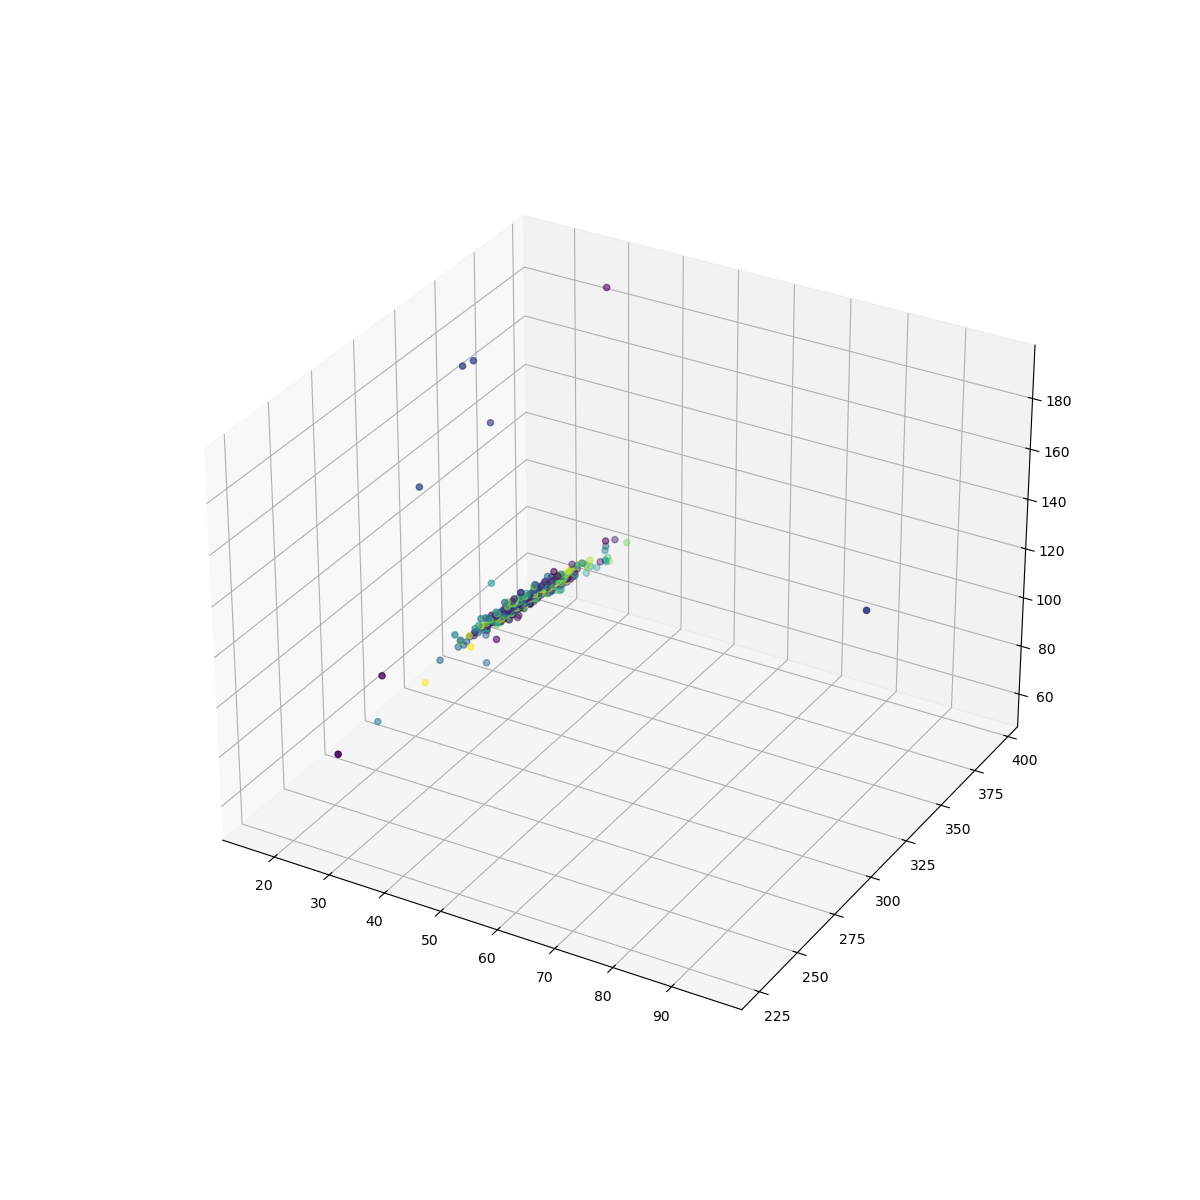

      Age    MCH   MCHC    MCV    MPV    PDW    RDW   Hematocrit  Hemoglobin  Granulocytes  Red blood cells  Leukocytes  Lymphocytes  Monocyte  Thrombocrit  Thrombocytes   ESR 
0    0.596  0.176  0.817  0.199  0.329  0.336  0.321     0.387       0.442        0.490          0.353          0.168       0.332       0.106      0.245         0.540     0.321
1    0.297  0.159  0.680  0.214  0.438  0.578  0.321     0.419       0.390        0.525          0.360          0.207       0.306       0.076      0.203         0.393     0.179
2    0.600  0.110  0.503  0.185  0.534  0.414  0.321     0.569       0.455        0.253          0.518          0.131       0.550       0.207      0.115         0.188     0.375
3    0.793  0.158  0.686  0.222  0.370  0.672  0.198     0.298       0.208        0.475          0.273          0.055       0.332       0.106      0.088         0.192     0.536
4    0.360  0.113  0.633  0.778  0.452  0.445  0.605     0.390       0.312        0.545          0.430          0.1

In [26]:
K = int(10)   #Clusters number

hierarchical_cluster = AgglomerativeClustering(n_clusters=K, metric='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(df_normalized)

print(df_normalized.shape[0])

n = int(df_normalized.shape[0])

    
matrix = np.zeros((n,K), dtype=int)

# Convertin predicted output to matrix Zaichenko w_ij form
for label_index in range(len(labels)):
    matrix[label_index][labels[label_index]] = 1

print(matrix)
print(len(matrix))


def division_coefficient():

    result = 0

    for j in range (0, K):
        for i in range (0, n):
            
            result+=(matrix[i][j]**2)/n

    return result

def crisp_index (div_coef):
    
    NFI = (K * div_coef - 1) / (K - 1)

    return NFI

def division_entropy():

    H = 0

    for j in range (0, K):
        for i in range (0, n):
            
            H += ((matrix[i][j]**2)*np.log(matrix[i][j]))/n
    
    H *= -1


dc = division_coefficient()
print("DIVISION COEFFICIENT: {0}", dc)
print("Crisp_index: {0}", crisp_index(dc))

print(labels)
#plt.scatter(df_male['MCH'], df_male['MCHC'], c=labels)
#plt.show()

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

sequence_containing_x_vals = list(range(220, 400))
sequence_containing_y_vals = list(range(0, 180))
sequence_containing_z_vals = list(range(0, 1000))



ax.scatter(df_male['MCH'],df_male['MCHC'],df_male['MCV'], c=labels)
plt.show()

# Результат
print(df_normalized)

def print_hi(name):
    # Use a breakpoint in the code line below to debug your script.
    print(f'Hi, {name}')  # Press Ctrl+F8 to toggle the breakpoint.


# Press the green button in the gutter to run the script.
if __name__ == '__main__':
    print_hi('PyCharm')

# See PyCharm help at https://www.jetbrains.com/help/pycharm/